In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

#plotting settings
sns.set()
%matplotlib inline

# Display
pd.set_option('display.max_rows', 999999)
pd.set_option('display.max_columns', 999999)
pd.set_option('display.width', 999999)

In [417]:
ds = pd.read_csv('./csse_covid_19_data/csse_covid_19_daily_reports/03-02-2020.csv')
ds.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,Mainland China,2020-03-02T15:03:23,67103,2803,33934,30.9756,112.2707
1,NaN,South Korea,2020-03-02T20:23:16,4335,28,30,36.0000,128.0000
2,NaN,Italy,2020-03-02T20:23:16,2036,52,149,43.0000,12.0000
3,NaN,Iran,2020-03-02T20:23:16,1501,66,291,32.0000,53.0000
4,Guangdong,Mainland China,2020-03-02T15:03:23,1350,7,1059,23.3417,113.4244


In [96]:
ds.shape

(125, 8)

# Coronavirus impact outside China barplots

In [418]:
#filtering dataframe for all countries outside China
covid_outside = ds[ds['Country/Region'] != 'Mainland China']
covid_outside

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
1,NaN,South Korea,2020-03-02T20:23:16,4335,28,30,36.0000,128.0000
2,NaN,Italy,2020-03-02T20:23:16,2036,52,149,43.0000,12.0000
3,NaN,Iran,2020-03-02T20:23:16,1501,66,291,32.0000,53.0000
11,Diamond Princess cruise ship,Others,2020-03-02T14:33:03,705,6,10,35.4437,139.6380
20,NaN,Japan,2020-03-02T20:33:02,274,6,32,36.0000,138.0000
23,NaN,France,2020-03-02T20:33:02,191,3,12,47.0000,2.0000
26,NaN,Germany,2020-03-02T20:33:02,159,0,16,51.0000,9.0000
31,NaN,Spain,2020-03-02T14:43:05,120,0,2,40.0000,-4.0000
32,NaN,Singapore,2020-03-02T20:33:02,108,0,78,1.2833,103.8333
33,Hong Kong,Hong Kong,2020-03-02T23:53:02,100,2,36,22.3000,114.2000


In [419]:
#making the country the index of the dataframe
covid_outside = covid_outside.pivot_table(index=['Country/Region'], 
                                     values = ['Confirmed', 'Deaths', 'Recovered'],
                                    aggfunc='max')
covid_outside.head()

,Confirmed,Deaths,Recovered
Country/Region,,,
Afghanistan,1,0,0
Algeria,3,0,0
Andorra,1,0,0
Armenia,1,0,0
Australia,9,1,4


In [439]:
covid_outside_top = covid_outside.sort_values(by ='Confirmed').nlargest(20, 'Confirmed')
covid_outside_top

,Confirmed,Deaths,Recovered
Country/Region,,,
South Korea,4335,28,30
Italy,2036,52,149
Iran,1501,66,291
Others,705,6,10
Japan,274,6,32
France,191,3,12
Germany,159,0,16
Spain,120,0,2
Singapore,108,0,78


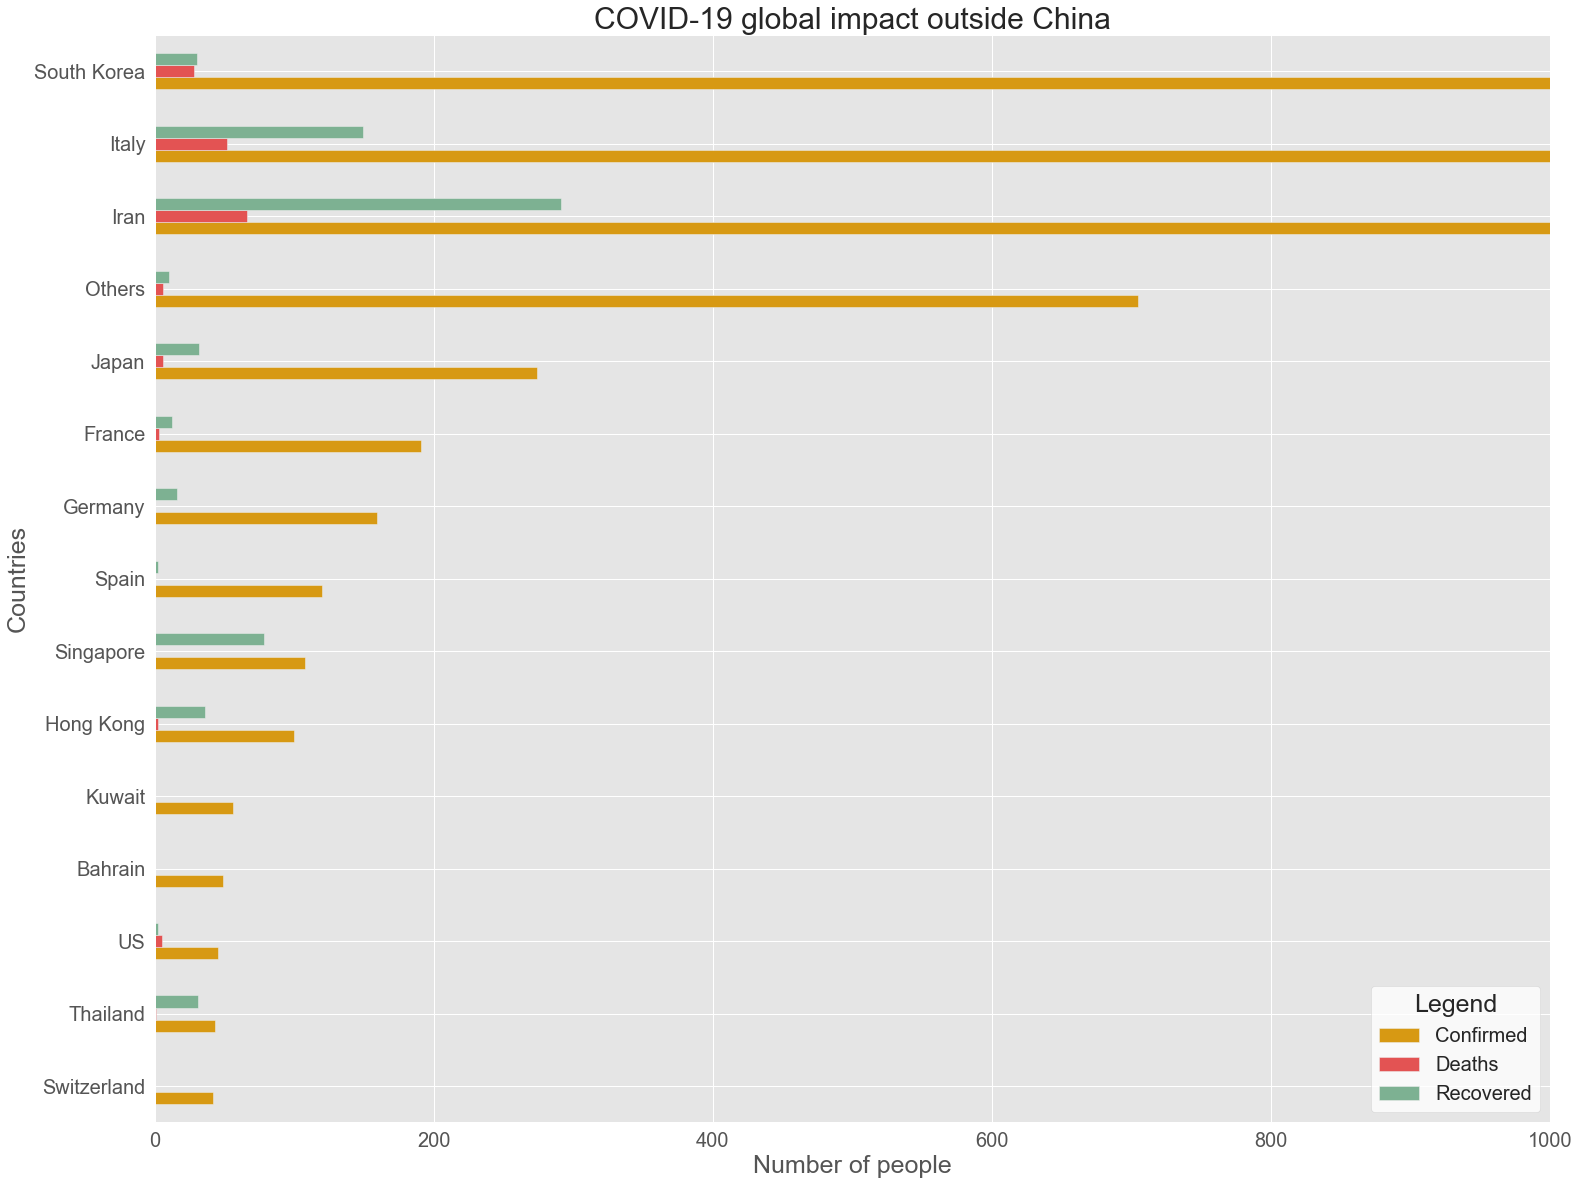

In [421]:
covid_outside_top.sort_values(by=['Confirmed'], ascending=True).plot.barh(figsize = (25, 20), 
                                                                               width=0.5, 
                                                                               align='center', 
                                                                               color = ['#D79913', 
                                                                                        '#E35353', 
                                                                                        '#7DB192'])
plt.xlabel('Number of people', fontsize=25)
plt.ylabel('Countries', fontsize=25)
plt.title('COVID-19 global impact outside China', fontsize=30)


plt.xlim(0, 1000)
plt.style.use('ggplot')

plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(fontsize=20, loc=0, facecolor = 'white', title = 'Legend', title_fontsize = 25)

plt.savefig('codvid_global_outside.jpg', dpi=480)
plt.show()

# Coronavirus impact inside China barplot

In [422]:
ds_china = ds.pivot_table(index=['Province/State'], values = ['Country/Region','Confirmed', 'Deaths', 'Recovered'],
                                     aggfunc='max')

ds_china = ds_china[ds_china['Country/Region'] == 'Mainland China'].nlargest(10, 'Deaths')
ds_china

,Confirmed,Country/Region,Deaths,Recovered
Province/State,,,,
Hubei,67103,Mainland China,2803,33934
Henan,1272,Mainland China,22,1205
Heilongjiang,480,Mainland China,13,356
Beijing,414,Mainland China,8,282
Guangdong,1350,Mainland China,7,1059
Anhui,990,Mainland China,6,917
Chongqing,576,Mainland China,6,469
Hebei,318,Mainland China,6,296
Shandong,758,Mainland China,6,460


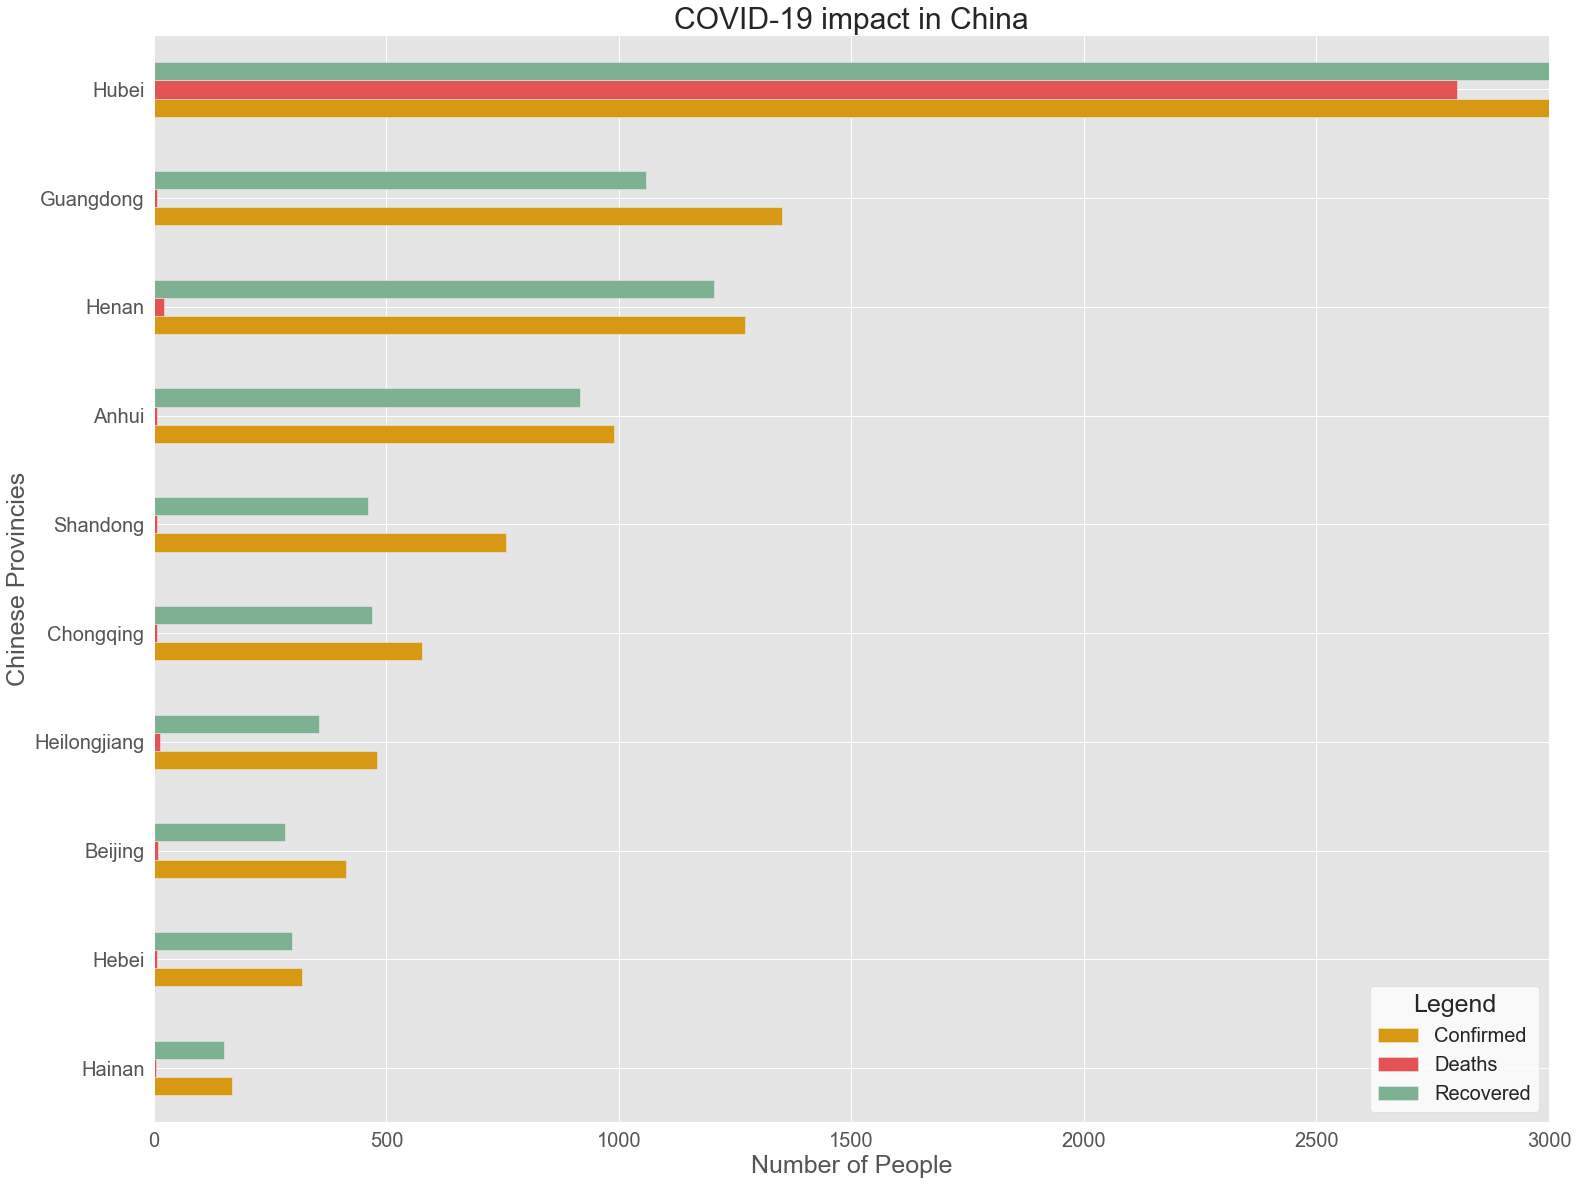

In [423]:
ds_china.sort_values(by=['Confirmed'], ascending=True).plot.barh(figsize = (25, 20), 
                                                              width=0.5, align='center', 
                                                              color = ['#D79913', 
                                                                       '#E35353', 
                                                                       '#7DB192'])

plt.ylabel('Chinese Provincies', fontsize=25)
plt.xlabel('Number of People', fontsize=25)
plt.title('COVID-19 impact in China', fontsize=30)

plt.xlim(0, 3000)
plt.style.use('ggplot')

plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(fontsize=20, loc=0, facecolor = 'white', title = 'Legend', title_fontsize = 25)

plt.savefig('codvid_in_China_.jpg', dpi=480)
plt.show()

# Time series analysis

In [457]:
confirmed = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')

In [458]:
deaths = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')

In [459]:
recovered = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [460]:
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20
0,Anhui,Mainland China,31.8257,117.2264,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,4,4,5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
1,Beijing,Mainland China,40.1824,116.4142,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,5,7,8,8,8
2,Chongqing,Mainland China,30.0572,107.8740,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,2,2,2,2,3,3,4,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6,6
3,Fujian,Mainland China,26.0789,117.9874,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1
4,Gansu,Mainland China,36.0611,103.8343,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [461]:
#looking at the number of rows and columns
deaths.shape

(142, 45)

In [462]:
deaths = deaths.groupby(['Country/Region']).sum()

In [463]:
deaths.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Armenia,40.0691,45.0382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Australia,-172.5889,989.6423,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [464]:
#removing latitude and longitude columns
deaths.drop(columns = ['Lat', 'Long'], axis=1, inplace=True)

In [465]:
#making date as index of dataframe to be used later on graphs
deaths_t = deaths.transpose()

In [466]:
deaths_t.head()

Country/Region,Afghanistan,Algeria,Andorra,Armenia,Australia,Austria,Azerbaijan,Bahrain,Belarus,Belgium,Brazil,Cambodia,Canada,Croatia,Czech Republic,Denmark,Dominican Republic,Ecuador,Egypt,Estonia,Finland,France,Georgia,Germany,Greece,Hong Kong,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Japan,Kuwait,Latvia,Lebanon,Lithuania,Luxembourg,Macau,Mainland China,Malaysia,Mexico,Monaco,Morocco,Nepal,Netherlands,New Zealand,Nigeria,North Macedonia,Norway,Oman,Others,Pakistan,Philippines,Portugal,Qatar,Romania,Russia,San Marino,Saudi Arabia,Senegal,Singapore,South Korea,Spain,Sri Lanka,Sweden,Switzerland,Taiwan,Thailand,UK,US,United Arab Emirates,Vietnam
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [467]:
# changing date format for better graphic visualisation of date
from datetime import datetime

In [468]:
deaths_t.index[1]

'1/23/20'

In [469]:
#converting index str type to dateime
deaths_t.index = pd.to_datetime(deaths_t.index).strftime('%d-%b-%Y')

In [470]:
deaths_t.tail()

Country/Region,Afghanistan,Algeria,Andorra,Armenia,Australia,Austria,Azerbaijan,Bahrain,Belarus,Belgium,Brazil,Cambodia,Canada,Croatia,Czech Republic,Denmark,Dominican Republic,Ecuador,Egypt,Estonia,Finland,France,Georgia,Germany,Greece,Hong Kong,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Japan,Kuwait,Latvia,Lebanon,Lithuania,Luxembourg,Macau,Mainland China,Malaysia,Mexico,Monaco,Morocco,Nepal,Netherlands,New Zealand,Nigeria,North Macedonia,Norway,Oman,Others,Pakistan,Philippines,Portugal,Qatar,Romania,Russia,San Marino,Saudi Arabia,Senegal,Singapore,South Korea,Spain,Sri Lanka,Sweden,Switzerland,Taiwan,Thailand,UK,US,United Arab Emirates,Vietnam
27-Feb-2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,26,0,0,0,17,4,0,0,0,0,0,0,2744,0,0,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,0,0,0,0,13,0,0,0,0,1,0,0,0,0,0
28-Feb-2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,34,0,0,0,21,4,0,0,0,0,0,0,2788,0,0,0,0,0,0,0,0,0,0,0,6,0,1,0,0,0,0,0,0,0,0,13,0,0,0,0,1,0,0,0,0,0
29-Feb-2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,43,0,0,0,29,5,0,0,0,0,0,0,2835,0,0,0,0,0,0,0,0,0,0,0,6,0,1,0,0,0,0,0,0,0,0,16,0,0,0,0,1,0,0,1,0,0
01-Mar-2020,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,54,0,0,0,34,6,0,0,0,0,0,0,2870,0,0,0,0,0,0,0,0,0,0,0,6,0,1,0,0,0,0,0,0,0,0,17,0,0,0,0,1,1,0,1,0,0
02-Mar-2020,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,2,0,0,0,66,0,0,0,52,6,0,0,0,0,0,0,2912,0,0,0,0,0,0,0,0,0,0,0,6,0,1,0,0,0,0,0,0,0,0,28,0,0,0,0,1,1,0,6,0,0


# Plotting deaths evolution in Europe

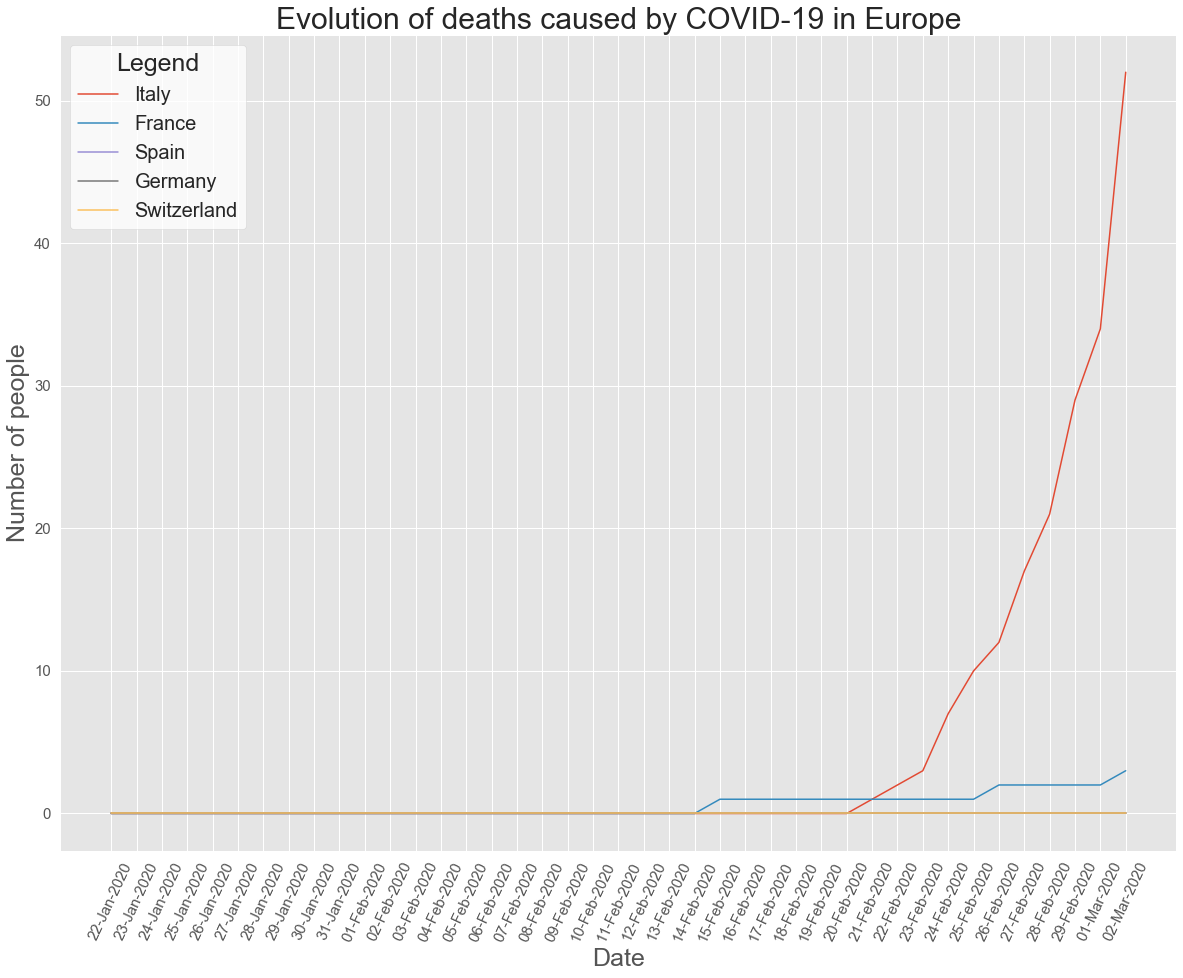

In [471]:
fig, ax = plt.subplots(figsize=(20, 15))

plt.ylabel('Number of people', fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.title('Evolution of deaths caused by COVID-19 in Europe', fontsize=30)

ax.plot(deaths_t.index,deaths_t.Italy, label = 'Italy')
ax.plot(deaths_t.index,deaths_t.France, label = 'France')
ax.plot(deaths_t.index,deaths_t.Spain, label = 'Spain')
ax.plot(deaths_t.index,deaths_t.Germany, label = 'Germany')
ax.plot(deaths_t.index,deaths_t.Switzerland, label = 'Switzerland')


plt.style.use('ggplot')
plt.xticks(fontsize=15, rotation=65)
plt.yticks(fontsize=15)
plt.tick_params(axis='x', which='major')

ax.get_legend_handles_labels()
ax.legend(fontsize=20, loc=0, facecolor = 'white', title = 'Legend', title_fontsize = 25)

plt.savefig('deaths_covid_evolution_Europe.jpg', dpi=480)
plt.show()

# Plotting confirmed cases evolution in Europe

In [472]:
confirmed = confirmed.groupby(['Country/Region']).sum()

In [473]:
confirmed.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3
Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Armenia,40.0691,45.0382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
Australia,-172.5889,989.6423,0,0,0,0,4,5,5,6,9,9,12,12,12,13,13,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,19,22,22,22,22,22,23,23,25,27,30


In [474]:
#removing latitude and longitude columns
confirmed.drop(columns = ['Lat', 'Long'], axis=1, inplace=True)

In [475]:
#making date as index of dataframe to be used later on graphs
confirmed_t = confirmed.transpose()

In [476]:
confirmed_t.head()

Country/Region,Afghanistan,Algeria,Andorra,Armenia,Australia,Austria,Azerbaijan,Bahrain,Belarus,Belgium,Brazil,Cambodia,Canada,Croatia,Czech Republic,Denmark,Dominican Republic,Ecuador,Egypt,Estonia,Finland,France,Georgia,Germany,Greece,Hong Kong,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Japan,Kuwait,Latvia,Lebanon,Lithuania,Luxembourg,Macau,Mainland China,Malaysia,Mexico,Monaco,Morocco,Nepal,Netherlands,New Zealand,Nigeria,North Macedonia,Norway,Oman,Others,Pakistan,Philippines,Portugal,Qatar,Romania,Russia,San Marino,Saudi Arabia,Senegal,Singapore,South Korea,Spain,Sri Lanka,Sweden,Switzerland,Taiwan,Thailand,UK,US,United Arab Emirates,Vietnam
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,547,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,2,0,1,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,639,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,3,0,1,0,2
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,916,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,0,0,0,0,3,5,0,2,0,2
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,1399,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,0,0,0,0,3,7,0,2,0,2
1/26/20,0,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,0,8,0,0,0,0,0,0,0,0,4,0,0,0,0,0,5,2062,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,3,0,0,0,0,4,8,0,5,0,2


In [477]:
# changing date format for better graphic visualisation of date
from datetime import datetime

In [478]:
confirmed_t.index[1]

'1/23/20'

In [479]:
#converting index str type to dateime
confirmed_t.index = pd.to_datetime(confirmed_t.index).strftime('%d-%b-%Y')

In [480]:
confirmed_t.tail()

Country/Region,Afghanistan,Algeria,Andorra,Armenia,Australia,Austria,Azerbaijan,Bahrain,Belarus,Belgium,Brazil,Cambodia,Canada,Croatia,Czech Republic,Denmark,Dominican Republic,Ecuador,Egypt,Estonia,Finland,France,Georgia,Germany,Greece,Hong Kong,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Japan,Kuwait,Latvia,Lebanon,Lithuania,Luxembourg,Macau,Mainland China,Malaysia,Mexico,Monaco,Morocco,Nepal,Netherlands,New Zealand,Nigeria,North Macedonia,Norway,Oman,Others,Pakistan,Philippines,Portugal,Qatar,Romania,Russia,San Marino,Saudi Arabia,Senegal,Singapore,South Korea,Spain,Sri Lanka,Sweden,Switzerland,Taiwan,Thailand,UK,US,United Arab Emirates,Vietnam
27-Feb-2020,1,1,0,0,23,3,0,33,0,1,1,1,13,3,0,1,0,0,1,1,2,38,1,46,3,92,0,3,0,245,7,0,3,655,214,43,0,2,0,0,10,78498,23,0,0,0,1,1,0,0,1,1,4,705,2,3,0,0,1,2,1,0,0,93,1766,15,1,7,8,32,40,15,60,13,16
28-Feb-2020,1,1,0,0,23,3,0,36,1,1,1,1,14,5,0,1,0,0,1,1,2,57,1,48,4,94,1,3,0,388,7,0,4,888,228,45,0,2,1,0,10,78824,23,1,0,0,1,1,1,1,1,6,4,705,2,3,0,0,3,2,1,0,0,93,2337,32,1,7,8,34,41,20,62,19,16
29-Feb-2020,1,1,0,0,25,9,0,41,1,1,2,1,20,6,0,3,0,0,1,1,3,100,1,79,4,95,1,3,0,593,13,1,7,1128,241,45,0,4,1,1,10,79251,25,4,1,0,1,6,1,1,1,15,6,705,4,3,0,1,3,2,1,0,0,102,3150,45,1,12,18,39,42,23,70,21,16
01-Mar-2020,1,1,0,1,27,14,3,47,1,2,2,1,24,7,3,4,1,6,2,1,6,130,3,130,7,96,3,3,0,978,19,1,10,1694,256,45,0,10,1,1,10,79826,29,5,1,0,1,10,1,1,1,19,6,705,4,3,0,3,3,2,1,0,0,106,3736,84,1,14,27,40,42,36,76,21,16
02-Mar-2020,1,3,1,1,30,18,3,49,1,8,2,1,27,7,3,4,1,6,2,1,6,191,3,159,7,100,6,5,2,1501,26,1,10,2036,274,56,1,13,1,1,10,80026,29,5,1,1,1,18,1,1,1,25,6,705,4,3,2,3,3,3,8,1,1,108,4335,120,1,15,42,41,43,40,105,21,16


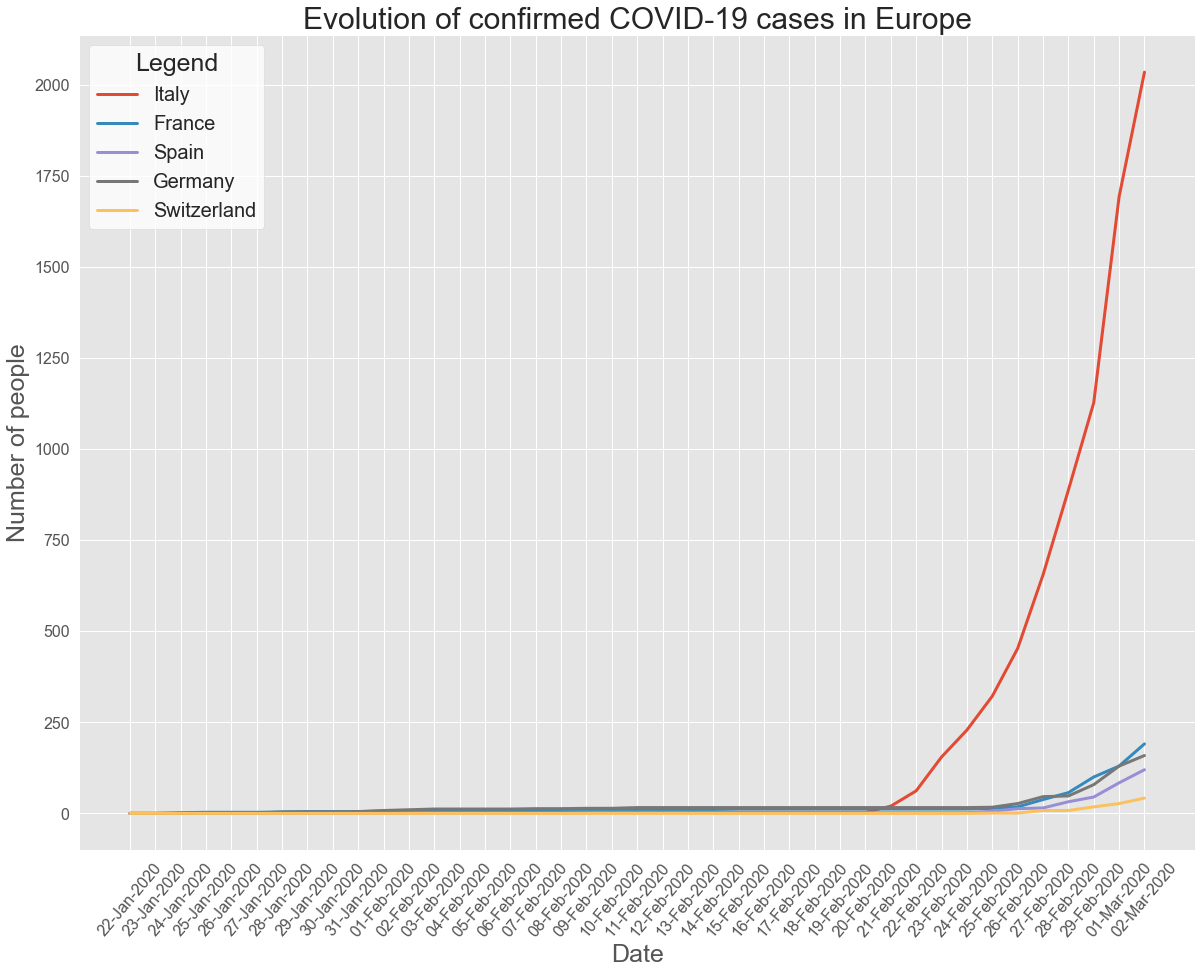

In [503]:
fig, ax = plt.subplots(figsize=(20, 15))

plt.ylabel('Number of people', fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.title('Evolution of confirmed COVID-19 cases in Europe', fontsize=30)

ax.plot(confirmed_t.index, confirmed_t.Italy, label = 'Italy', lw=3)
ax.plot(confirmed_t.index, confirmed_t.France, label = 'France', lw=3)
ax.plot(confirmed_t.index, confirmed_t.Spain, label = 'Spain', lw=3)
ax.plot(confirmed_t.index, confirmed_t.Germany, label = 'Germany', lw=3)
ax.plot(confirmed_t.index, confirmed_t.Switzerland, label = 'Switzerland', lw=3)

plt.style.use('ggplot')
plt.xticks(fontsize=16, rotation=50)
plt.yticks(fontsize=16)
plt.tick_params(axis='x', which='major')

ax.get_legend_handles_labels()
ax.legend(fontsize=20, loc=0, facecolor = 'white', title = 'Legend', title_fontsize = 25)

plt.savefig('confirmed_covid_evolution_Europe.jpg', dpi=480)
plt.show()

# GeoPandas visualisation 

In [488]:
#importing world map template
world_map = gpd.read_file('./Countries_WGS84/Countries_WGS84.shp')

In [490]:
# designate coordinate system
crs = {'init' :'epsg:4326'}

# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(ds['Longitude'], ds['Latitude'])]

# create GeoPandas dataframe
geo_ds = gpd.GeoDataFrame(ds, crs = crs, geometry = geometry)

/Applications/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [491]:
geo_ds

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,geometry
0,Hubei,Mainland China,2020-03-02T15:03:23,67103,2803,33934,30.9756,112.2707,POINT (112.27070 30.97560)
1,NaN,South Korea,2020-03-02T20:23:16,4335,28,30,36.0000,128.0000,POINT (128.00000 36.00000)
2,NaN,Italy,2020-03-02T20:23:16,2036,52,149,43.0000,12.0000,POINT (12.00000 43.00000)
3,NaN,Iran,2020-03-02T20:23:16,1501,66,291,32.0000,53.0000,POINT (53.00000 32.00000)
4,Guangdong,Mainland China,2020-03-02T15:03:23,1350,7,1059,23.3417,113.4244,POINT (113.42440 23.34170)
5,Henan,Mainland China,2020-03-02T11:43:03,1272,22,1205,33.8820,113.6140,POINT (113.61400 33.88200)
6,Zhejiang,Mainland China,2020-03-02T11:43:03,1206,1,1069,29.1832,120.0934,POINT (120.09340 29.18320)
7,Hunan,Mainland China,2020-03-02T11:43:03,1018,4,887,27.6104,111.7088,POINT (111.70880 27.61040)
8,Anhui,Mainland China,2020-03-02T15:03:23,990,6,917,31.8257,117.2264,POINT (117.22640 31.82570)
9,Jiangxi,Mainland China,2020-03-02T01:33:02,935,1,850,27.6140,115.7221,POINT (115.72210 27.61400)


In [493]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)

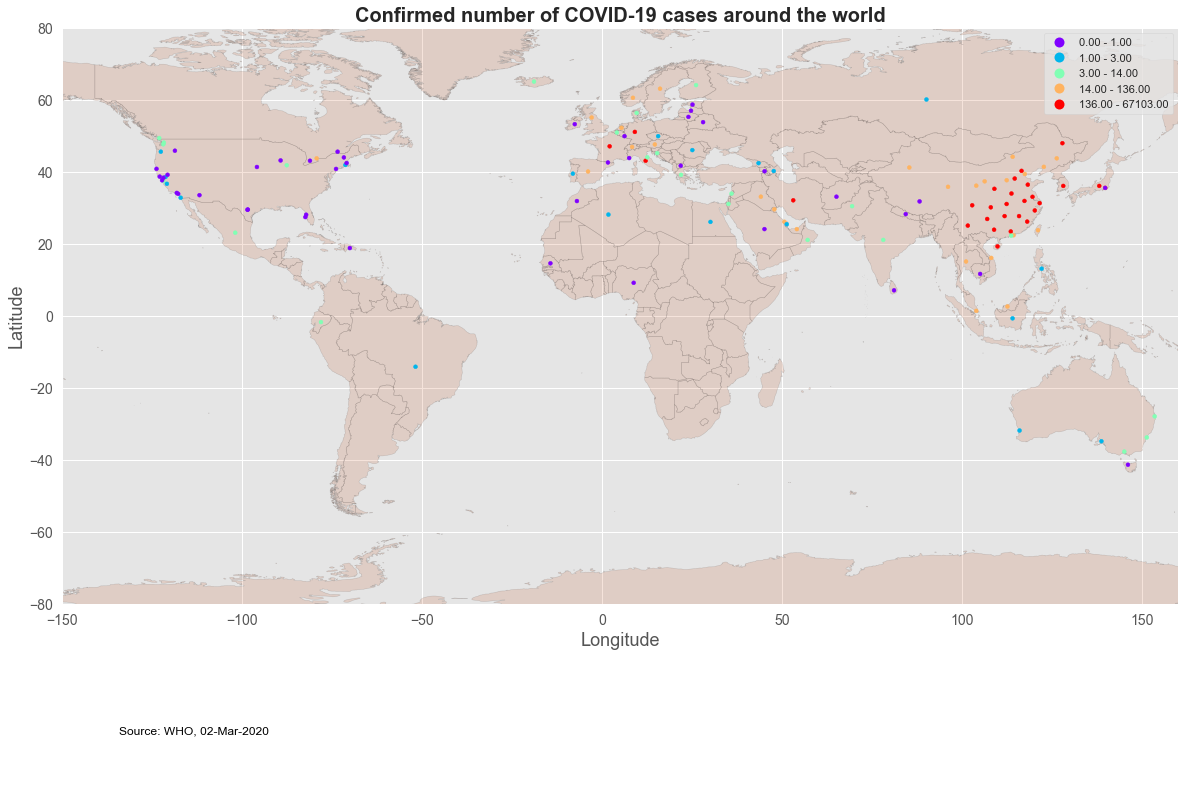

In [514]:
fig, ax = plt.subplots(figsize=(20,15))

world_map.plot(ax=ax, alpha=0.15, color='#C24813', edgecolor='black')

geo_ds.plot(column='Confirmed', ax=ax, markersize=15, 
            legend=True, 
            categorical=False, 
            scheme='Quantiles',
            cmap='rainbow')

plt.xlim(-150,160)
plt.ylim(-80,80)
plt.title('Confirmed number of COVID-19 cases around the world', fontsize=20, fontweight='bold')
plt.ylabel('Latitude', fontsize=18)
plt.xlabel('Longitude', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax.annotate('Source: WHO, 02-Mar-2020', xy=(0.1, .08),  xycoords='figure fraction', 
            ha='left', va='top', fontsize=12, color='black')


plt.savefig('codvid_global_map_confirmed.jpg', dpi=480)
plt.show()

In [509]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)

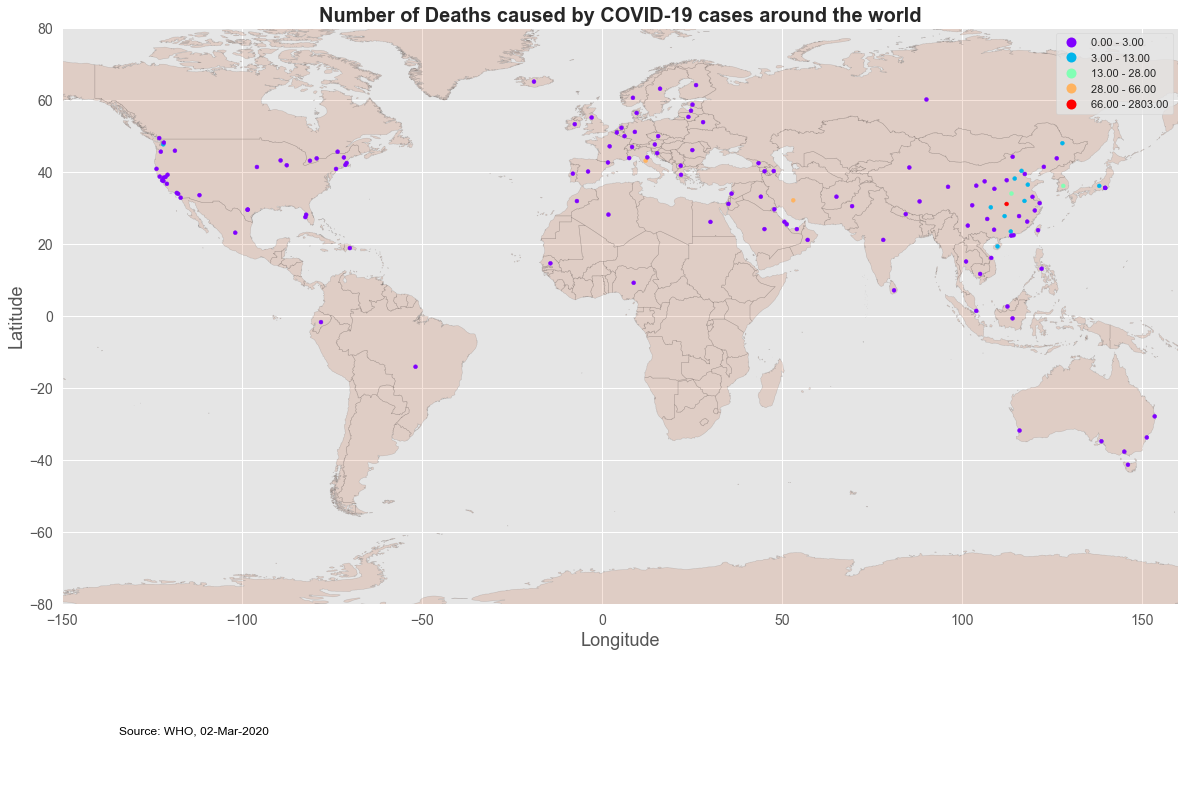

In [512]:
fig, ax = plt.subplots(figsize=(20,15))

world_map.plot(ax=ax, alpha=0.15, color='#C24813', edgecolor='black')

geo_ds.plot(column='Deaths', ax=ax, markersize=15, 
            legend=True, 
            categorical=False, 
            scheme='Percentiles',
            cmap='rainbow')

plt.xlim(-150,160)
plt.ylim(-80,80)
plt.title('Number of Deaths caused by COVID-19 cases around the world', fontsize=20, fontweight='bold')
plt.ylabel('Latitude', fontsize=18)
plt.xlabel('Longitude', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax.annotate('Source: WHO, 02-Mar-2020', xy=(0.1, .08),  xycoords='figure fraction', 
            ha='left', va='top', fontsize=12, color='black')


plt.savefig('codvid_global_map_deaths.jpg', dpi=480)
plt.show()